In [1]:
# The following is to know when this notebook has been run and with which python version.
import time, sys
print(time.ctime())
print(sys.version.split('|')[0])

Sun Sep 17 09:40:19 2023
3.9.16 (main, Jan 11 2023, 10:02:19) 
[Clang 14.0.6 ]


# E Introduction to Scipy

This is part of the Python lecture given by Christophe Morisset at IA-UNAM.

Scipy is a library with a lot of foncionalities, we will not cover everything here, but rather point to some of them with examples.
Some useful links about scipy:

* https://scipy-lectures.github.io/intro/scipy.html
* https://docs.scipy.org/doc/scipy/tutorial/index.html

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import scipy # This imports a lot of scipy stuff, but not the "important" modules

### Some usefull methods

In [5]:
from scipy.special import gamma
%timeit g1 = gamma(10.3)
%timeit g1 = gamma(10)
%timeit g2 = 9*8*7*6*5*4*3*2
%timeit g3 = 10*9*8*7*6*5*4*3*2
g1 = gamma(10.3)
g2 = 9*8*7*6*5*4*3*2
g3 = 10*9*8*7*6*5*4*3*2
print(g1, g2, g3)

917 ns ± 49.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.41 µs ± 135 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
16.4 ns ± 0.608 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)
16.8 ns ± 0.772 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)
716430.6890623764 362880 3628800


In [12]:
from scipy import constants as cst
print(cst.astronomical_unit) # A lot of constants
print('{} {}'.format(cst.value('proton mass'), cst.unit('proton mass')))

149597870700.0
1.67262192369e-27 kg


List there: http://docs.scipy.org/doc/scipy/reference/constants.html#constants-database

### Integrations

In [14]:
from scipy.integrate import trapz, cumtrapz, simps
#help(scipy.integrate) # a big one...
print('----------------------------------------------------------------------------------')
help(trapz)
print('----------------------------------------------------------------------------------')
help(cumtrapz)
print('----------------------------------------------------------------------------------')
help(simps)

----------------------------------------------------------------------------------
Help on function trapz in module scipy.integrate._quadrature:

trapz(y, x=None, dx=1.0, axis=-1)
    An alias of `trapezoid`.
    
    `trapz` is kept for backwards compatibility. For new code, prefer
    `trapezoid` instead.

----------------------------------------------------------------------------------
Help on function cumtrapz in module scipy.integrate._quadrature:

cumtrapz(y, x=None, dx=1.0, axis=-1, initial=None)
    An alias of `cumulative_trapezoid`.
    
    `cumtrapz` is kept for backwards compatibility. For new code, prefer
    `cumulative_trapezoid` instead.

----------------------------------------------------------------------------------
Help on function simps in module scipy.integrate._quadrature:

simps(y, x=None, dx=1.0, axis=-1, even='avg')
    An alias of `simpson`.
    
    `simps` is kept for backwards compatibility. For new code, prefer
    `simpson` instead.



In [11]:
dir(scipy.integrate)

['AccuracyWarning',
 'BDF',
 'DOP853',
 'DenseOutput',
 'IntegrationWarning',
 'LSODA',
 'OdeSolution',
 'OdeSolver',
 'RK23',
 'RK45',
 'Radau',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bvp',
 '_dop',
 '_ivp',
 '_ode',
 '_odepack',
 '_quad_vec',
 '_quadpack',
 '_quadrature',
 'complex_ode',
 'cumtrapz',
 'cumulative_trapezoid',
 'dblquad',
 'fixed_quad',
 'lsoda',
 'newton_cotes',
 'nquad',
 'ode',
 'odeint',
 'odepack',
 'quad',
 'quad_explain',
 'quad_vec',
 'quadpack',
 'quadrature',
 'romb',
 'romberg',
 'simps',
 'simpson',
 'solve_bvp',
 'solve_ivp',
 'test',
 'tplquad',
 'trapezoid',
 'trapz',
 'vode']

In [15]:
# Defining x and y
x = np.linspace(0, np.pi, 100)
%timeit  y = np.sin(x)
y = np.sin(x)
# Compare the integrales using two methods
%timeit i1 = trapz(y, x)
%timeit i2 = simps(y, x)

print(trapz(y, x))
print(simps(y, x))

x = np.linspace(0, np.pi, 10)
y = np.sin(x)
%timeit i1 = trapz(y, x)
%timeit i2 = simps(y, x)
print(trapz(y, x))
print(simps(y, x))


1.76 µs ± 133 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
17.2 µs ± 872 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
183 µs ± 23.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.9998321638939929
1.9999999690165366
16.4 µs ± 1.12 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
180 µs ± 24 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.9796508112164835
1.9995487365804028


In [17]:
# Cumulative integrale
cum = cumtrapz(np.abs(y), x)
print(len(x), type(cum), len(cum), cum)

10 <class 'numpy.ndarray'> 9 [0.05969378 0.23157515 0.4949127  0.81794403 1.16170678 1.48473811
 1.74807566 1.91995704 1.97965081]


10 9


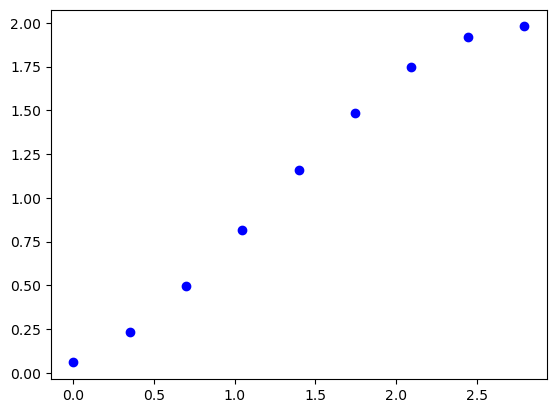

In [18]:
# Cumulative integral

print('{} {}'.format(len(x), len(cumtrapz(np.abs(y), x))))
f, ax = plt.subplots()
ax.plot(x[0:-1], cumtrapz(np.abs(y), x), 'bo');

In [19]:
from scipy.integrate import quad # To compute a definite integral
help(quad)

Help on function quad in module scipy.integrate._quadpack_py:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate. If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
    
        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::
    
            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)
    
        The ``user_data`` is t

In [22]:
from scipy.integrate import quad # To compute a definite integral
from scipy.special import jv # Bessel function
%timeit res = quad(np.sin, 0, np.pi)
print(quad(np.sin, 0, np.pi))
#help(quad)
print(quad(lambda x: jv(2.5, x), 0, 10)) # Integrate the Bessel function of order 2.5 between 0 and 10

21.4 µs ± 1.7 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
(2.0, 2.220446049250313e-14)
(0.8209075326034347, 1.1793289815399173e-08)


We now want to evaluate:
$$ \int_0^1 1 + 2 x + 3 x^2 dx $$

In [21]:
# We want here integrate a user-defined function (here polynome) between 0 and 1
def f(x, a, b, c):
    """ Returning a 2nd order polynome """
    return a + b * x + c * x**2
def f123(x):
    return 1 + 2 * x + 3 * x**2    
def f123b(x, a=1, b=2, c=3):
    return a + b * x + c * x**2
%timeit I = quad(f, 0, 1, args=(1,2,3)) # args will send 1, 2, 3 to f
%timeit I = quad(f123, 0, 1) 
%timeit I = quad(f123b, 0, 1) 
I = quad(f, 0, 1, args=(1,2,3)) # args will send 1, 2, 3 to f
print(I)
Integ = I[0]
print(Integ)

5.28 µs ± 15.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.96 µs ± 28.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.18 µs ± 19.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
(3.0, 3.3306690738754696e-14)
3.0


### Interpolations

In [23]:
from scipy.interpolate import interp1d, interp2d, splrep, splev, griddata

In [24]:
#help(scipy.interpolate) # a huge one...
help(interp1d)

Help on class interp1d in module scipy.interpolate.interpolate:

class interp1d(scipy.interpolate.polyint._Interpolator1D)
 |  interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
 |  
 |  Interpolate a 1-D function.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``. This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      A 1-D array of real values.
 |  y : (...,N,...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`.
 |  kind : str or int, optional
 |      Specifies the kind of interpolation as a string or as an integer
 |      specifying the order of the spline interpolator to use.
 |      The string has to be one of 'linear', 'nearest', 'nearest-up', 'zero',
 |      'slinear', 'quadrati

In [28]:
x = np.linspace(0, 10, 10)
y = np.sin(x)
f = interp1d(x, y) # this creates a function that can be call at any interpolate point
f2 = interp1d(x, y, kind='cubic') # The same but using cubic interpolation
tck = splrep(x, y, s=0) # This initiate the spline interpolating function, finding the B-spline representation of 1-D curve.
# tck is a sequence of length 3 returned by `splrep` or `splprep` containing the knots, coefficients, and degree of the spline.
f3 = lambda x: splev(x, tck) # Evaluate the B-spline or its derivatives.

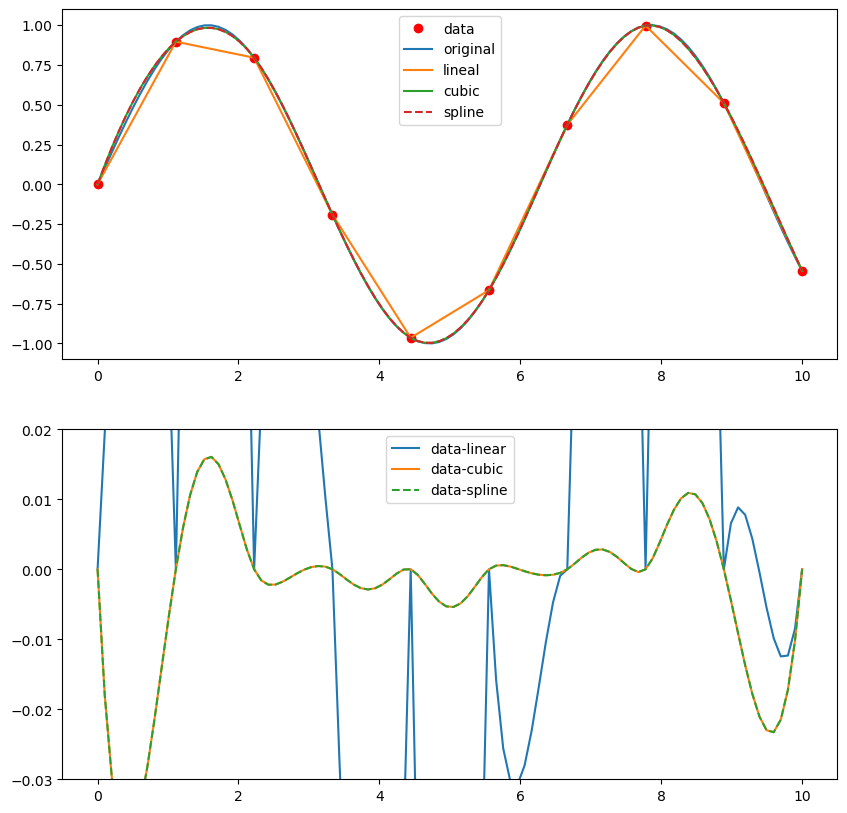

In [29]:
# Defining the high resolution mesh
xfine = np.linspace(0, 10, 100)
yfine = np.sin(xfine)
# Plot to compare the results
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))

ax1.plot(x, y, 'or', label='data')
ax1.plot(xfine, yfine, label='original')
ax1.plot(xfine, f(xfine), label='lineal')
ax1.plot(xfine, f2(xfine), label='cubic')
ax1.plot(xfine, f3(xfine), label='spline', ls='--') 
ax1.legend(loc=9)

ax2.plot(xfine, (yfine - f(xfine)), label='data-linear')
ax2.plot(xfine, (yfine - f2(xfine)), label='data-cubic')
ax2.plot(xfine, (yfine - f3(xfine)), label='data-spline', ls='--')
ax2.legend(loc='best')
ax2.set_ylim((-0.03, 0.02));

In [28]:
x0 = 3.5
print('{} {} {} {}'.format(np.sin(x0), f(x0), f2(x0), f3(x0)))

-0.35078322768961984 -0.3066303359834792 -0.34959725240218925 -0.3495972524021892


#### 2D interpolation

In [30]:
# Defining a 2D-function
def func(x, y):
    return x * (1+x) * np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [31]:
# Initializing a 2D coordinate grid. Note the use of j to specify that the end point is included.
grid_y, grid_x = np.mgrid[0:1:101j, 0:1:201j]

In [32]:
print(grid_x)
print(grid_y)

[[0.    0.005 0.01  ... 0.99  0.995 1.   ]
 [0.    0.005 0.01  ... 0.99  0.995 1.   ]
 [0.    0.005 0.01  ... 0.99  0.995 1.   ]
 ...
 [0.    0.005 0.01  ... 0.99  0.995 1.   ]
 [0.    0.005 0.01  ... 0.99  0.995 1.   ]
 [0.    0.005 0.01  ... 0.99  0.995 1.   ]]
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 ...
 [0.98 0.98 0.98 ... 0.98 0.98 0.98]
 [0.99 0.99 0.99 ... 0.99 0.99 0.99]
 [1.   1.   1.   ... 1.   1.   1.  ]]


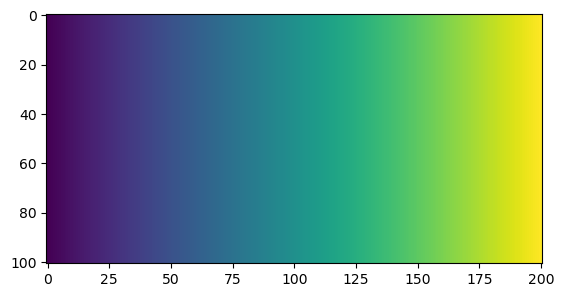

In [34]:
plt.imshow(grid_x)

In [36]:
# Generating 1000 x 2 points randomly
points = np.random.rand(1000, 2)
print(points)
values = func(points[:,0], points[:,1])
print(np.min(points), np.max(points))

[[0.58285163 0.02017694]
 [0.98469475 0.73882545]
 [0.1508262  0.30640621]
 ...
 [0.76712557 0.46335445]
 [0.85832259 0.30865531]
 [0.54425035 0.38268348]]
0.0004222369284355709 0.999759691718544


In [37]:
# griddata is the 2D-interpolating method. We want to obtain values on (grid_x, grid_y) points, 
# using "points" and "values".
%timeit grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
%timeit grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
%timeit grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

23.5 ms ± 1.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
9.94 ms ± 452 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.9 ms ± 476 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [38]:
print(np.min(values), np.max(values))

-1.3216183431172221 1.9716371839860183


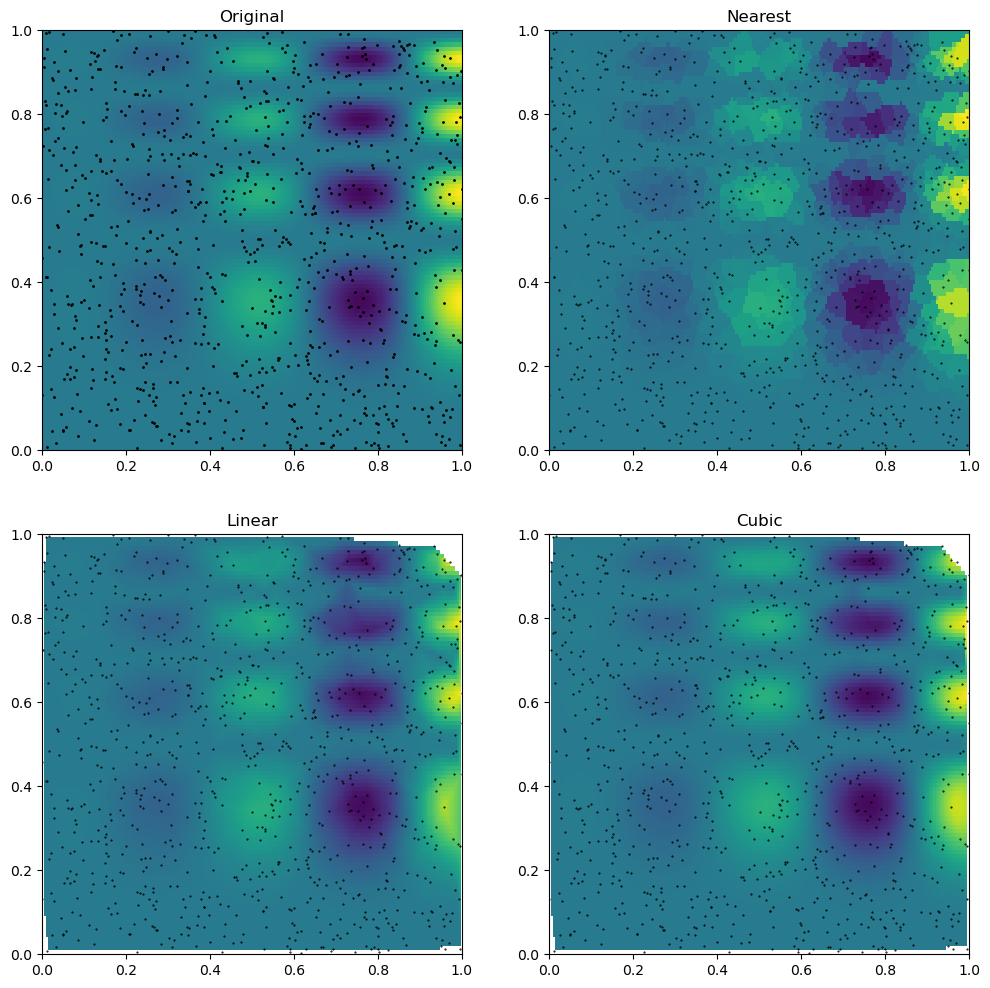

In [60]:
# 4 subplots
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
extent = (0, 1, 0, 1)
origin = 'lower'
ax1.imshow(func(grid_x, grid_y), extent=extent, interpolation='none',
           origin=origin, vmin=-1.4, vmax=2.0)
ax1.plot(points[:,0], points[:,1], 'ko', ms=1)
ax1.set_title('Original')

ax2.imshow(grid_z0, extent=extent, interpolation='none',
           origin=origin, vmin=-1.4, vmax=2.0)
ax2.plot(points[:,0], points[:,1], 'k.', ms=1)
ax2.set_title('Nearest')

ax3.imshow(grid_z1, extent=extent, interpolation='none',
           origin=origin, vmin=-1.4, vmax=2.0)
ax3.plot(points[:,0], points[:,1], 'k.', ms=1)
ax3.set_title('Linear')

ax4.imshow(grid_z2, extent=extent, interpolation='none',
           origin=origin, vmin=-1.4, vmax=2.0)
ax4.plot(points[:,0], points[:,1], 'k.', ms=1)
ax4.set_title('Cubic');

In [40]:
print(grid_z0[10,10], grid_z1[10,10], grid_z2[10,10])

0.00033012283816004335 0.0006611507622104852 0.0006647105471534465


### Linear algebra

Scipy is able to deal with matrices, solving linear equations, solving linear least-squares problems and pseudo-inverses, finding eigenvalues and eigenvectors, and more, see here: 
https://docs.scipy.org/doc/scipy/tutorial/linalg.html

### Data fit

In [61]:
from scipy.optimize import curve_fit # this is used to adjust a set of data

In [62]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize._minpack_py:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``.
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...). It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like or object
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, but can actually be any object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional
        Initial guess for the parameters (length N). If No

In [63]:
def gauss(x, A, B, C, S):
    # This is a gaussian function.
    return A + B*np.exp(-1 * (x - C)**2 / (2 * S**2))

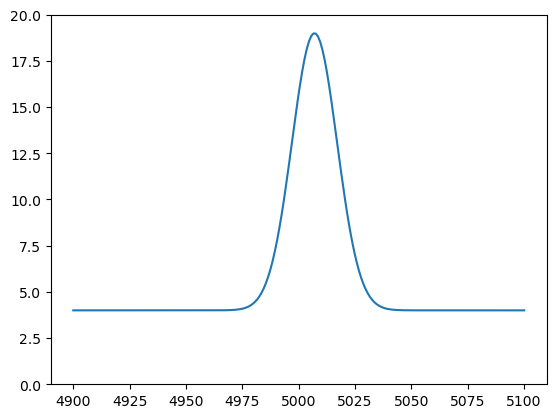

In [64]:
# We define the parameters used to generate the signal (gaussian at lambda=5007)
N_lam = 200
A = 4.
B = 15.
Lam0 = 5007.
Sigma = 10.
# We define a wavelength range
lam = np.linspace(4900, 5100, N_lam)
# Computing the signal
fl = gauss(lam, A, B, Lam0, Sigma)
f, ax =plt.subplots()
ax.plot(lam, fl)
ax.set_ylim(0,20);

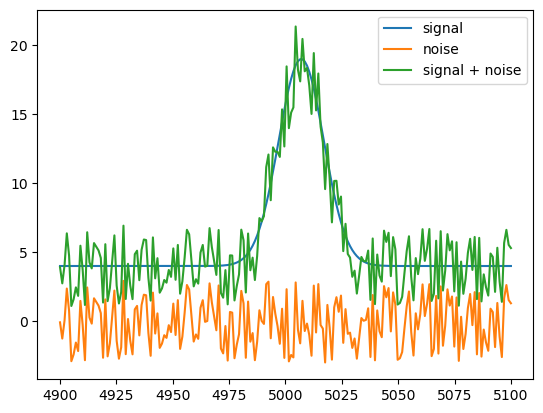

In [72]:
SN = 5. # Signal/Noise
noise = B / SN * (np.random.rand(N_lam)*2 - 1)
fl2 = fl + noise
f, ax =plt.subplots()
ax.plot(lam, fl, label='signal')
ax.plot(lam, noise, label='noise')
ax.plot(lam, fl2, label='signal + noise')
ax.legend(loc='best');

In [73]:
# Initial guess:
A_i = 0.
B_i = 1.
Lam0_i = 5000.
Sigma_i = 1.
fl_init = gauss(lam, A_i, B_i, Lam0_i, Sigma_i)
error = np.ones_like(lam) * np.mean(np.abs(noise)) # We define the error (the same on each pixel of the spectrum)

In [74]:
# fitting the noisy data with the gaussian function, using the initial guess and the errors
fit, covar = curve_fit(gauss, lam, fl2, [A_i, B_i, Lam0_i, Sigma_i], error)
print('{0:.2f} {1:5.2f} {2:.2f} {3:5.2f} {4:5.2f}'.format(A_i, B_i, Lam0_i, Sigma_i, B_i*Sigma_i))
print('{0:.2f} {1:5.2f} {2:.2f} {3:5.2f} {4:5.2f}'.format(A, B, Lam0, Sigma, B*Sigma))
print('{0[0]:.2f} {0[1]:5.2f} {0[2]:5.2f} {0[3]:.2f}  {1:5.2f}'.format(fit, fit[1]*fit[3]))

0.00  1.00 5000.00  1.00  1.00
4.00 15.00 5007.00 10.00 150.00
3.86 14.72 5007.00 10.10  148.68


In [75]:
# Computing the fit on the lambdas
fl_fit = gauss(lam, fit[0], fit[1], fit[2], fit[3])

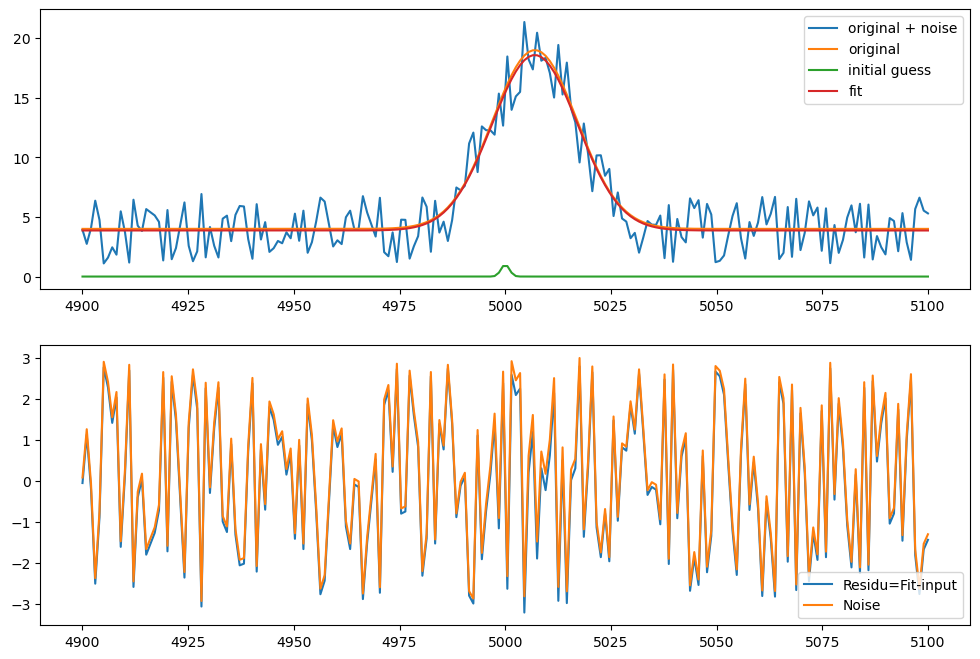

In [76]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.plot(lam, fl2, label='original + noise')
ax1.plot(lam, fl, label='original')
ax1.plot(lam, fl_init, label='initial guess')
ax1.plot(lam, fl_fit, label='fit')
ax1.legend()

ax2.plot(lam, fl_fit - fl2, label='Residu=Fit-input')
ax2.plot(lam, -noise, label='Noise')
ax2.legend();

In [77]:
# Integrating using the Simpson method the gaussian (without the continuum)
print(simps(fl - A, lam))
print(simps(fl2 - fit[0], lam))
print(simps(fl_fit - fit[0], lam))

375.99424119465004
371.86873765195986
372.6950491068127


In [78]:
khi_sq = (((fl2-fl_fit) / error)**2).sum() # The problem here is to determine the error...
khi_sq_red = khi_sq / (len(lam) - 4 - 1) # reduced khi_sq = khi_sq / (N - free_params - 1)
print('khi^2={}, khi^2_reduced={}'.format(khi_sq, khi_sq_red))

khi^2=260.59689695712905, khi^2_reduced=1.3363943433698926


### Convolution

More information there: http://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html

In [85]:
# Let's define an image representing a long slit of width 10 pixels
slit = np.zeros((100, 100))
slit[30:50, :] = 1

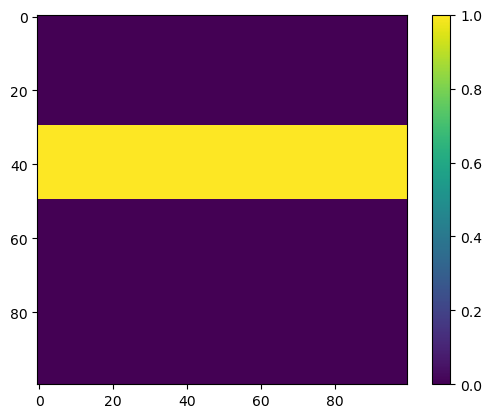

In [86]:
plt.imshow(slit)
plt.colorbar();

In [88]:
# This is the routine to apply a gaussian convolution
from scipy.ndimage import gaussian_filter

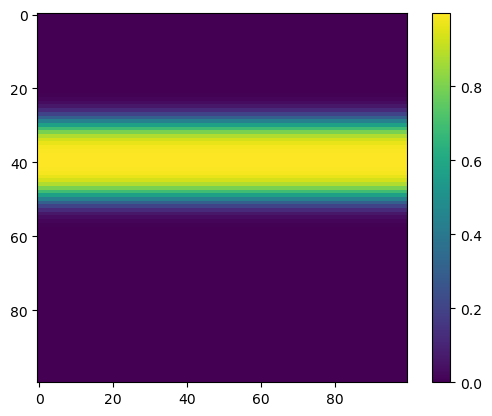

In [89]:
slit_seeing = gaussian_filter(slit, 3) # Convolve with a gaussian, 3 is the standard deviation in pixels
plt.imshow(slit_seeing)
plt.colorbar();

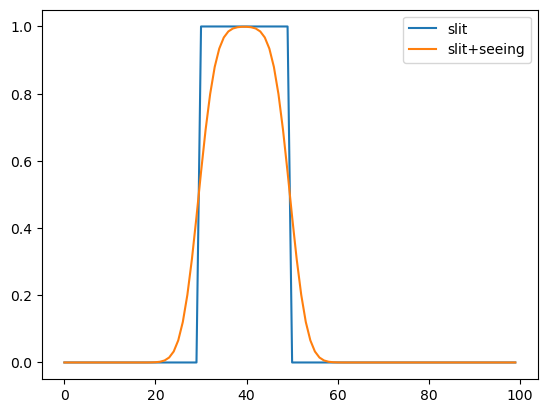

In [90]:
f, ax =plt.subplots()
ax.plot(slit[:,50], label='slit') # original slit
ax.plot(slit_seeing[:,50], label='slit+seeing') # slit with seeing
ax.legend(loc='best');

In [91]:
# Check that the slit transmission is conserved:
print(simps(slit[:,50]), simps(slit_seeing[:,50]))

20.0 20.0


### Quantiles

In [92]:
from scipy.stats.mstats import mquantiles

In [118]:
#help(mquantiles)

In [105]:
data = np.random.randn(100000)

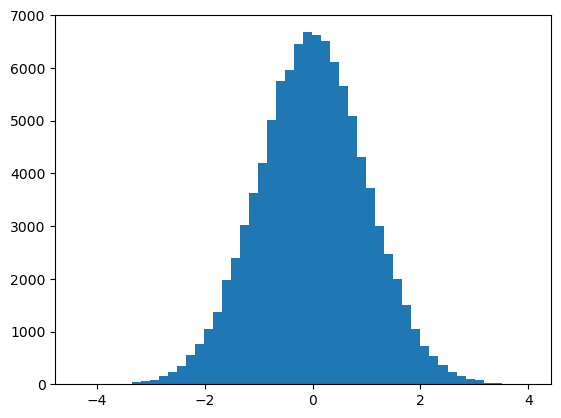

In [106]:
f, ax = plt.subplots()
ax.hist(data, bins=50);

In [107]:
mquantiles(data, [0.16, 0.5,0.84]) # should return something close to -1, 0, 1 (the stv of the normal distribution)

array([-0.99458906,  0.00134218,  0.9971658 ])

In [108]:
data = np.array([[   6.,    7.,    1.],
                         [  47.,   15.,    2.],
                         [  49.,   36.,    3.],
                         [  15.,   39.,    4.],
                         [  42.,   40., -999.],
                         [  41.,   41., -999.],
                         [   7., -999., -999.],
                         [  39., -999., -999.],
                         [  43., -999., -999.],
                         [  40., -999., -999.],
                         [  36., -999., -999.]])

In [115]:
mq = mquantiles(data, axis=0, limit=(0, 50))
print(mq)


[[19.2  14.6   1.45]
 [40.   37.5   2.5 ]
 [42.8  40.05  3.55]]


### Input/Output

Scipy has many modules, classes, and functions available to read data from and write data to a variety of file formats.

Including MATLAB and IDL files. See http://docs.scipy.org/doc/scipy/reference/io.html